In [51]:
# Load mat files
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import os

In [80]:
data_paths = glob('data/*.csv')
print(f"Number of stocks {len(data_paths)}")
amzn_data_p = [d for d in data_paths if 'AMZN' in d]
data_paths = [d for d in data_paths if 'AMZN' not in d]
print(f"Number of stocks after removing AMZN {len(data_paths)}")

Number of stocks 27
Number of stocks after removing AMZN 26


### Lè me looking at the data

In [75]:
ds1 = pd.read_csv(data_paths[5])
print(data_paths[5])
ds1.head()

data/TSM.csv


,Date,Open,High,Low,Close,AdjClose,Volume
0,2013-11-27,17.660000,17.719999,17.510000,17.580000,13.253728,13181100
1,2013-11-29,17.700001,17.790001,17.660000,17.730000,13.366815,3991200
2,2013-12-02,17.690001,17.750000,17.360001,17.400000,13.118024,12010000
3,2013-12-03,17.440001,17.700001,17.430000,17.530001,13.216037,10074800
4,2013-12-04,17.469999,17.650000,17.450001,17.540001,13.223575,6448500


In [82]:
id2name = {}
data_arr = []
for i, dpath in enumerate(data_paths):
    name = os.path.basename(dpath).split('.')[0]
    id2name[i] = name

    ds = pd.read_csv(dpath)
    data_arr.append(ds['Close'].values)

data_arr = np.array(data_arr)
print(data_arr.shape)

amzn_ds = pd.read_csv(amzn_data_p[0])
amzn_data = amzn_ds['Close'].values

(26, 2515)


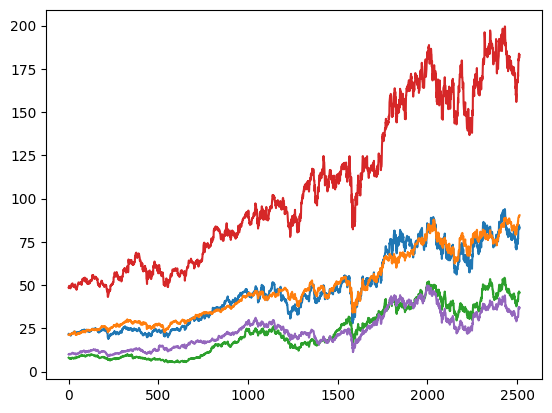

In [84]:
for i in range(5):
    plt.plot(data_arr[i])
plt.show()

### Data preparation

In [ ]:
id2name[26] = 'AMZN'
print(id2name)
print(f"Shape of data is {data_arr.shape}")


{0: 'MCHP', 1: 'APH', 2: 'STM', 3: 'ADI', 4: 'IFNNY', 5: 'TSM', 6: 'INTC', 7: 'GLW', 8: 'TXN', 9: 'AMAT', 10: 'AMD', 11: 'KLAC', 12: 'NXPI', 13: 'NVDA', 14: 'MRVL', 15: 'MPWR', 16: 'MRAAY', 17: 'AVGO', 18: 'TEL', 19: 'ON', 20: 'QCOM', 21: 'HXGBY', 22: 'GRMN', 23: 'MU', 24: 'ASML', 25: 'LRCX', 27: 'AMZN', 26: 'AMZN'}
Shape of data is (26, 2515)


In [83]:
train_split = 0.9
split_idx = np.int64(data_arr.shape[1] * train_split)
train_data = data_arr[:, :split_idx]
test_data = data_arr[:, split_idx:]
print(f"Shape of training data {train_data.shape}")
print(f"Shape of testing data {test_data.shape}")

amzn_train = amzn_data[:np.int64(len(amzn_data) * train_split)]
amzn_test = amzn_data[np.int64(len(amzn_data) * train_split):]

Shape of training data (26, 2263)
Shape of testing data (26, 252)


#### Estimation metrics

In [98]:
def compute_mse(Y, Y_hat):
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    assert Y.shape == Y_hat.shape, f"Shape mismatch {Y.shape}, {Y_hat.shape}"
    return np.mean((Y - Y_hat)**2)

def compute_mae(Y, Y_hat):
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    assert Y.shape == Y_hat.shape, f"Shape mismatch {Y.shape}, {Y_hat.shape}"
    return np.mean(np.abs(Y - Y_hat))

def compute_linf(Y, Y_hat):
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    assert Y.shape == Y_hat.shape, f"Shape mismatch {Y.shape}, {Y_hat.shape}"
    return np.max(np.abs(Y - Y_hat))

### Baseline moving average

In [ ]:
ma_Y_preds = []
Y_true = []
ma5_losses = []
ma50_losses = []
ma200_losses = []
window5 = []
window50 = []
window200 = []

print(f"{'Stock':<10}{'MSE loss':<15}{'MAE loss':<15}{'Linf loss':<15}")

for idx, x_test in enumerate(test_data):
    y_pred5 = []
    y_pred50 = []
    y_pred200 = []

    for i in range(5, len(x_test)):
        ma5 = np.mean(x_test[i-5:i])
        if i >= 50:
            ma50 = np.mean(x_test[i-50:i])
            y_pred50.append(ma50)
        if i >= 200:
            ma200 = np.mean(x_test[i-200:i])
            y_pred200.append(ma200)
        y_pred5.append(ma5)
        
    ma_Y_preds.append(y_pred5)
    Y5 = x_test[5:]
    Y50 = x_test[50:]
    Y200 = x_test[200:]
    mse5 = compute_mse(Y5, y_pred5)
    mae5 = compute_mae(Y5, y_pred5)
    linf5 = compute_linf(Y5, y_pred5)

    mse50 = compute_mse(Y50, y_pred50)
    mae50 = compute_mae(Y50, y_pred50)
    linf50 = compute_linf(Y50, y_pred50)

    mse200 = compute_mse(Y200, y_pred200)
    mae200 = compute_mae(Y200, y_pred200)
    linf200 = compute_linf(Y200, y_pred200)
    
    # Print losses in aligned columns
    print(f"{id2name[idx]:<10}{mse5:<15.4f}{mae5:<15.4f}{linf5:<15.4f}")
    ma5_losses.append({"MSE": mse5, "MAE": mae5, "Linf": linf5})
    ma50_losses.append({"MSE": mse50, "MAE": mae50, "Linf": linf50})
    ma200_losses.append({"MSE": mse200, "MAE": mae200, "Linf": linf200})


y_pred5 = []
y_pred50 = []
y_pred200 = []

for i in range(5, len(amzn_test)):
    ma5 = np.mean(amzn_test[i-5:i])
    if i >= 50:
        ma50 = np.mean(amzn_test[i-50:i])
        y_pred50.append(ma50)
    if i >= 200:
        ma200 = np.mean(amzn_test[i-200:i])
        y_pred200.append(ma200)
    y_pred5.append(ma5)
    
Y5 = amzn_test[5:]
Y50 = amzn_test[50:]
Y200 = amzn_test[200:]
mse5 = compute_mse(Y5, y_pred5)
mae5 = compute_mae(Y5, y_pred5)
linf5 = compute_linf(Y5, y_pred5)

mse50 = compute_mse(Y50, y_pred50)
mae50 = compute_mae(Y50, y_pred50)
linf50 = compute_linf(Y50, y_pred50)

mse200 = compute_mse(Y200, y_pred200)
mae200 = compute_mae(Y200, y_pred200)
linf200 = compute_linf(Y200, y_pred200)

# Print losses in aligned columns
print(f"{'AMZN':<10}{mse5:<15.4f}{mae5:<15.4f}{linf5:<15.4f}")
ma5_losses.append({"MSE": mse5, "MAE": mae5, "Linf": linf5})
ma50_losses.append({"MSE": mse50, "MAE": mae50, "Linf": linf50})
ma200_losses.append({"MSE": mse200, "MAE": mae200, "Linf": linf200})


Stock     MSE loss       MAE loss       Linf loss      
MCHP      5.5698         1.8900         8.5760         
APH       2.1095         1.1380         4.4060         
STM       2.3448         1.2161         4.4340         
ADI       17.9787        3.3018         16.7960        
IFNNY     1.6558         0.9869         4.6860         
TSM       6.9145         1.9840         10.0460        
INTC      1.6019         0.9891         4.3680         
GLW       0.4908         0.5402         2.7140         
TXN       12.3581        2.8052         10.7420        
AMAT      16.0551        3.2481         11.9360        
AMD       17.1818        3.1745         16.9180        
KLAC      179.4067       10.6908        45.8400        
NXPI      27.9475        4.3517         14.7340        
NVDA      232.1599       11.3186        69.1120        
MRVL      5.6212         1.6700         18.7220        
MPWR      426.0419       15.9163        79.2860        
MRAAY     0.0444         0.1608         0.8700  

### Lè begins the Wiener

In [261]:
# Compute Rxx using for loop
def compute_rxx(X):
    N = len(X)
    r_xx = []
    for i in range(0, N):
        r_xx.append(X[:N-i].T @ X[i:N] / (N - i))
    return np.array(r_xx)

def construct_Rxx(r_xx, W):
    Rxx = np.zeros((W, W))  # Initialize a W x W matrix with zeros
    
    # Fill the matrix using the Toeplitz property
    for i in range(W):
        for j in range(W):
            Rxx[i, j] = r_xx[abs(i - j)]  # Use |i-j| to find the lag
    
    return Rxx

def compute_rxy(X, Y):
    assert X.shape[0] == Y.shape[0], "Shapes need to be the same"
    N = len(X)
    r_xy = []
    for i in range(N):
        r_xy.append(X[:N - i] @ Y[i:N] / (N - i))
    return np.array(r_xy)

In [262]:
# Sanity check for r_xy
X = train_data[0]
N = X.shape[0]
days = 5
X1, Y1 = X[:N - days], X[days:]

rxx = compute_rxx(X)
rxy = compute_rxy(X1, Y1)
(rxx[days:] != rxy).sum()
print("Computing Rxy is the same as taking the Rxx with the corresponding day shift!")

Computing Rxy is the same as taking the Rxx with the corresponding day shift!


#### Test the filters on Training data

In [263]:
window = 20
day_shift = 1
rxxs = [compute_rxx(x) for x in train_data] # Same shape as X_train
Rxx_mats = [construct_Rxx(rxx, W=window) for rxx in rxxs]

# Get the proper rxy
rxys = [rxx[day_shift:] for rxx in rxxs]
# Setup the r_xy vector based on chosen window
r_xys = [rxy[:window] for rxy in rxys]

In [264]:
rxx_amzn = compute_rxx(amzn_train)
Rxx_amzn = construct_Rxx(rxx_amzn, W=window)

In [265]:
# Get the proper rxy
rxy_amzn = rxx_amzn[day_shift:]
# Setup the r_xy vector based on chosen window
r_xy_amzn = rxy_amzn[:window]
h_amzn = np.linalg.inv(Rxx_amzn) @ r_xy_amzn

In [266]:
H_opts = np.array([np.linalg.inv(Rxx) @ r_xy for (Rxx, r_xy) in zip(Rxx_mats, r_xys)])
print(f"Shape of H_opts is {H_opts.shape}")

Shape of H_opts is (26, 20)


In [270]:
Y_preds = []
Y_true = []
wiener_losses = []
for x_train, h_opt in zip(train_data, H_opts):
    # Split x_train (1,N) to X and Y and reshape to (K, W)
    N = x_train.shape[0]
    X = []
    Y = []
    predict_offset = window + (day_shift - 1)
    max_N = N - predict_offset
    for i in range(max_N):
        X.append(x_train[i:i + window])
        Y.append(x_train[i + predict_offset])
    X = np.array(X)
    Y = np.array(Y)
    # print(X.shape, Y.shape, h_opt.shape)
    Y_pred = X @ h_opt

    mse = compute_mse(Y, Y_pred)
    mae = compute_mae(Y, Y_pred)
    linf = compute_linf(Y, Y_pred)
    print(f"MSE loss: {mse:.4f}\tMAE loss: {mae:.4f}\tLinf loss: {linf:.4f}")
    wiener_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})
    Y_preds.append(Y_pred)
    Y_true.append(Y)

Y_preds = np.array(Y_preds)
Y_true = np.array(Y_true)

MSE loss: 20.2240	MAE loss: 3.1292	Linf loss: 26.2045
MSE loss: 10.3114	MAE loss: 2.2264	Linf loss: 17.8246
MSE loss: 6.4330	MAE loss: 1.7257	Linf loss: 15.3173
MSE loss: 55.9418	MAE loss: 5.4021	Linf loss: 39.5587
MSE loss: 5.6882	MAE loss: 1.6940	Linf loss: 12.1878
MSE loss: 25.2169	MAE loss: 3.1429	Linf loss: 26.4727
MSE loss: 106962.5941	MAE loss: 209.3952	Linf loss: 2899.8407
MSE loss: 4.7874	MAE loss: 1.6470	Linf loss: 9.4133
MSE loss: 51.4359	MAE loss: 5.0641	Linf loss: 37.7449
MSE loss: 50.4297	MAE loss: 4.5354	Linf loss: 36.5017
MSE loss: 60.8149	MAE loss: 4.1962	Linf loss: 46.2980
MSE loss: 394.1670	MAE loss: 12.2217	Linf loss: 116.8419
MSE loss: 119.3779	MAE loss: 7.7615	Linf loss: 67.4016
MSE loss: 248.6126	MAE loss: 7.9202	Linf loss: 102.0866
MSE loss: 14.7259	MAE loss: 2.3362	Linf loss: 25.1026
MSE loss: 801.2001	MAE loss: 16.1619	Linf loss: 156.6509
MSE loss: 0.7738	MAE loss: 0.6664	Linf loss: 4.0851
MSE loss: 666.2540	MAE loss: 17.6130	Linf loss: 141.9415
MSE loss: 42.4

In [271]:
# Y_preds.shape, train_data.shape
# plt.plot(Y_true[0], label="True")
# plt.plot(Y_preds[0], label="Wiener prediction")
# plt.legend()
# plt.show()

#### Test on testing data

In [272]:
print(f"{'Stock':<10}{'MSE loss':<15}{'MAE loss':<15}{'Linf loss':<15}")

Y_preds = []
Y_true = []
wiener_losses = []
for idx, (x_test, h_opt) in enumerate(zip(test_data, H_opts)):
    # Split x_test (1,N) to X and Y and reshape to (K, W)
    N = x_test.shape[0]
    X = []
    Y = []
    predict_offset = window + (day_shift - 1)
    max_N = N - predict_offset
    for i in range(max_N):
        X.append(x_test[i:i + window])
        Y.append(x_test[i + predict_offset])
    X = np.array(X)
    Y = np.array(Y)
    # print(X.shape, Y.shape, h_opt.shape)
    Y_pred = X @ h_opt

    mse = compute_mse(Y, Y_pred)
    mae = compute_mae(Y, Y_pred)
    linf = compute_linf(Y, Y_pred)
    print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
    # print(f"MSE loss: {mse:.4f}\tMAE loss: {mae:.4f}\tLinf loss: {linf:.4f}")
    wiener_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})
    Y_preds.append(Y_pred)
    Y_true.append(Y)

Y_preds = np.array(Y_preds)
Y_true = np.array(Y_true)

x_test, h_opt = amzn_test, h_amzn
# Split x_test (1,N) to X and Y and reshape to (K, W)
N = x_test.shape[0]
X = []
Y = []
predict_offset = window + (day_shift - 1)
max_N = N - predict_offset
for i in range(max_N):
    X.append(x_test[i:i + window])
    Y.append(x_test[i + predict_offset])
X = np.array(X)
Y = np.array(Y)
# print(X.shape, Y.shape, h_opt.shape)
Y_pred = X @ h_opt

mse = compute_mse(Y, Y_pred)
mae = compute_mae(Y, Y_pred)
linf = compute_linf(Y, Y_pred)
print(f"{'AMZN':<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
# print(f"MSE loss: {mse:.4f}\tMAE loss: {mae:.4f}\tLinf loss: {linf:.4f}")
wiener_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

Stock     MSE loss       MAE loss       Linf loss      
MCHP      37.7107        5.0167         16.3031        
APH       13.6926        3.0209         10.5196        
STM       23.1512        3.9300         14.0130        
ADI       87.9173        7.6203         30.3921        
IFNNY     10.1043        2.5895         8.5224         
TSM       58.7092        5.9279         20.8874        
INTC      51251.0872     173.7169       746.2686       
GLW       4.8890         1.8802         5.1768         
TXN       85.3483        7.7996         20.1256        
AMAT      92.9739        7.6701         25.3564        
AMD       152.9295       9.4730         37.4772        
KLAC      1165.1100      26.0684        97.5908        
NXPI      226.6670       12.5890        37.7986        
NVDA      2177.8671      36.1788        138.8095       
MRVL      51.1618        5.2118         26.4453        
MPWR      2974.8441      43.0619        145.1932       
MRAAY     0.4405         0.5436         2.2304  

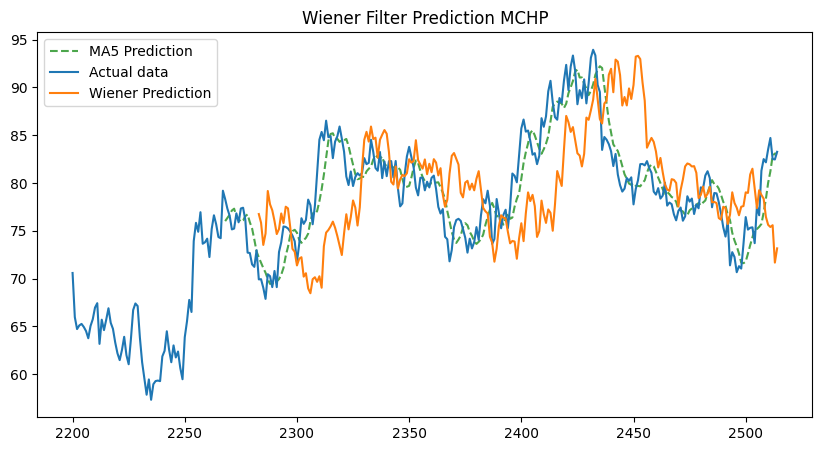

In [273]:
stock = 0
test_idx = train_data.shape[1] + predict_offset
test_x = np.arange(test_idx, data_arr.shape[1])
train_start = 2200
train_x = np.arange(train_start, data_arr.shape[1])

ma_x = np.arange(train_data.shape[1] + 1, data_arr.shape[1])
plt.figure(figsize=(10, 5))
plt.plot(ma_x[4:], ma_Y_preds[stock], label="MA5 Prediction", color="green", alpha=0.7, linestyle='dashed')
plt.plot(train_x, data_arr[stock, train_start:], label="Actual data")
plt.plot(test_x, Y_preds[stock], label="Wiener Prediction")
plt.title(f"Wiener Filter Prediction {id2name[stock]}")
plt.legend()

### Lè begins Least Mean Squares

In [251]:
# h[n+1] = h[n] + lamda * e[n] * x[n] / (x[n].T * x[n])
# e[n] = y[n] - h[n].T @ x[n]
window = 30
day_shift = 5
# all_ypreds = []
# all_ytrue = []
# all_errors = []
LMSlosses = []
h_lms_all = []

for x_train in train_data:
    Y_preds = []
    Y_true = []
    errors = []
    N = x_train.shape[0]
    predict_offset = window + (day_shift - 1)
    max_N = N - predict_offset
    h_lms = np.zeros((window, 1))
    lamda = 1.0

    for i in range(max_N):
        X = x_train[i:i + window][np.newaxis, ...]
        Y = x_train[i + predict_offset]
        Y_pred = X @ h_lms

        err = Y - Y_pred
        h_lms += (lamda * err * X / (X @ X.T)).T

        Y_preds.append(Y_pred[0][0])
        Y_true.append(Y)
        errors.append(err[0][0])
    Y_true = np.array(Y_true)
    Y_preds = np.array(Y_preds)
    h_lms_all.append(h_lms)
    mse = compute_mse(Y_true, Y_preds)
    mae = compute_mae(Y_true, Y_preds)
    # print(f"MSE loss: {mse:.4f}\tMAE loss: {mae:.4f}")
    # LMSlosses.append({"MSE" : mse, "MAE" : mae})

#     all_ypreds.append(Y_preds)
#     all_ytrue.append(Y_true)
#     all_errors.append(errors)
# all_errors = np.array(all_errors)
x_train = amzn_train
Y_preds = []
Y_true = []
errors = []
N = x_train.shape[0]
predict_offset = window + (day_shift - 1)
max_N = N - predict_offset
h_lms = np.zeros((window, 1))
lamda = 1.0

for i in range(max_N):
    X = x_train[i:i + window][np.newaxis, ...]
    Y = x_train[i + predict_offset]
    Y_pred = X @ h_lms

    err = Y - Y_pred
    h_lms += (lamda * err * X / (X @ X.T)).T

    Y_preds.append(Y_pred[0][0])
    Y_true.append(Y)
    errors.append(err[0][0])
Y_true = np.array(Y_true)
Y_preds = np.array(Y_preds)
h_lms_all.append(h_lms)
mse = compute_mse(Y_true, Y_preds)
mae = compute_mae(Y_true, Y_preds)

In [252]:
# h[n+1] = h[n] + lamda * e[n] * x[n] / (x[n].T * x[n])
# e[n] = y[n] - h[n].T @ x[n]

print(f"{'Stock':<10}{'MSE loss':<15}{'MAE loss':<15}{'Linf loss':<15}")
all_ypreds = []
all_ytrue = []
all_errors = []
LMSlosses = []

for idx, (x_test, h_lms) in enumerate(zip(test_data, h_lms_all)):
    Y_preds = []
    Y_true = []
    errors = []
    N = x_test.shape[0]
    predict_offset = window + (day_shift - 1)
    max_N = N - predict_offset
    lamda = 1.0

    for i in range(max_N):
        X = x_test[i:i + window][np.newaxis, ...]
        Y = x_test[i + predict_offset]
        Y_pred = X @ h_lms

        err = Y - Y_pred
        h_lms += (lamda * err * X / (X @ X.T)).T

        Y_preds.append(Y_pred[0][0])
        Y_true.append(Y)
        errors.append(err[0][0])
    Y_true = np.array(Y_true)
    Y_preds = np.array(Y_preds)
    mse = compute_mse(Y_true, Y_preds)
    mae = compute_mae(Y_true, Y_preds)
    linf = compute_linf(Y_true, Y_preds)
    LMSlosses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})
    print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")

    all_ypreds.append(Y_preds)
    all_ytrue.append(Y_true)
    all_errors.append(errors)

idx += 1
x_test, h_lms = amzn_test, h_lms_all[-1]
Y_preds = []
Y_true = []
errors = []
N = x_test.shape[0]
predict_offset = window + (day_shift - 1)
max_N = N - predict_offset
lamda = 1.0

for i in range(max_N):
    X = x_test[i:i + window][np.newaxis, ...]
    Y = x_test[i + predict_offset]
    Y_pred = X @ h_lms

    err = Y - Y_pred
    h_lms += (lamda * err * X / (X @ X.T)).T

    Y_preds.append(Y_pred[0][0])
    Y_true.append(Y)
    errors.append(err[0][0])
Y_true = np.array(Y_true)
Y_preds = np.array(Y_preds)
mse = compute_mse(Y_true, Y_preds)
mae = compute_mae(Y_true, Y_preds)
linf = compute_linf(Y_true, Y_preds)
LMSlosses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})
print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")

all_ypreds.append(Y_preds)
all_ytrue.append(Y_true)
all_errors.append(errors)
# all_errors = np.array(all_errors)

Stock     MSE loss       MAE loss       Linf loss      
MCHP      3.8217         1.4450         13.3406        
APH       1.0879         0.7784         5.8170         
STM       1.1090         0.8272         3.4338         
ADI       11.7943        2.3890         24.0814        
IFNNY     0.9602         0.6692         7.4588         
TSM       4.0697         1.3956         12.0861        
INTC      0.6780         0.6369         3.1215         
GLW       0.2274         0.3460         2.4118         
TXN       7.0995         2.0474         10.8166        
AMAT      9.8428         2.2567         20.2659        
AMD       10.8380        2.4061         17.4967        
KLAC      109.0757       7.6280         59.7895        
NXPI      16.6759        3.2280         20.1436        
NVDA      116.1595       7.8002         73.3511        
MRVL      3.2713         1.1954         15.8508        
MPWR      218.6041       11.2298        73.8528        
MRAAY     0.0214         0.1132         0.5587  

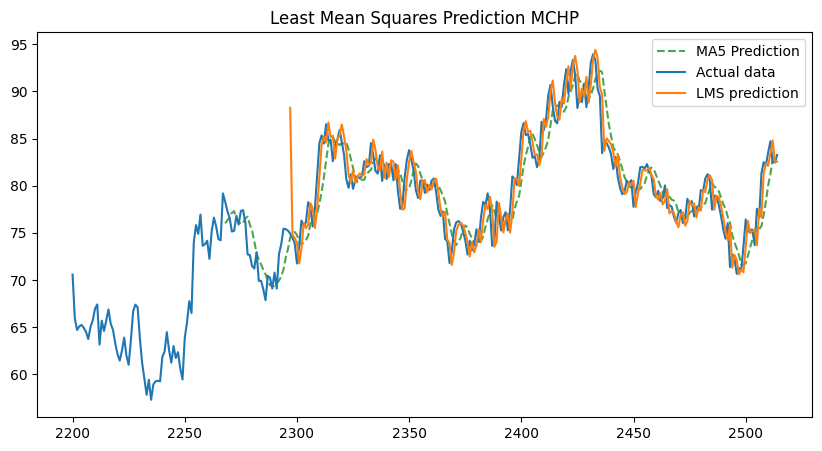

In [257]:
stock = 0
test_idx = train_data.shape[1] + predict_offset
test_x = np.arange(test_idx, data_arr.shape[1])
train_start = 2200
train_x = np.arange(train_start, data_arr.shape[1])

ma_x = np.arange(train_data.shape[1] + 1, data_arr.shape[1])
plt.figure(figsize=(10, 5))
plt.plot(ma_x[4:], ma_Y_preds[stock], label="MA5 Prediction", color="green", alpha=0.7, linestyle='dashed')
plt.plot(train_x, data_arr[stock, train_start:], label="Actual data")
plt.plot(test_x, all_ypreds[stock], label="LMS prediction")
plt.title(f"Least Mean Squares Prediction {id2name[stock]}")
plt.legend()

### Lè begins Recursive Least Squares

In [244]:
P = 50
window = 30
day_shift = 5
all_ypreds = []
all_ytrue = []
all_errors = []
rls_losses = []
h_rls_all = []
all_Pn = []

for idx, x_train in enumerate(train_data):
    # Init Pn = inv(Rn) = inv(Xn Diag(L) Xn.T)
    Xn = []
    lamdas = []
    lamda0 = 0.95
    for i in range(P):
        Xn.append(x_train[i:i + window])
        lamdas.append(lamda0**i)
    lamdas = np.diag(lamdas)
    Xn = np.array(Xn).T
    Pn = np.linalg.inv(Xn @ lamdas @ Xn.T)

    #### Run Recursive Least Squares
    Y_preds = []
    Y_true = []
    errors = []
    N = x_train.shape[0]
    predict_offset = window + (day_shift - 1)
    max_N = N - predict_offset
    h_rls = np.zeros((window, 1))
    lamda = 0.95

    for i in range(P, max_N):
        X = x_train[i:i + window][..., np.newaxis]
        Y = x_train[i + predict_offset]
        Y_pred = h_rls.T @ X

        alpha = Y - Y_pred
        g = Pn @ X * np.linalg.inv(lamda + X.T @ Pn @ X)
        Pn = (Pn - g @ X.T @ Pn) / lamda
        h_rls += alpha * g

        Y_preds.append(Y_pred[0][0])
        Y_true.append(Y)
        errors.append(err[0][0])
        
    all_Pn.append(Pn)
    Y_true = np.array(Y_true)
    Y_preds = np.array(Y_preds)
    h_rls_all.append(h_rls)
    mse = compute_mse(Y_true, Y_preds)
    mae = compute_mae(Y_true, Y_preds)
    linf = compute_linf(Y_true, Y_preds)
    # print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
    # rls_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

    all_ypreds.append(Y_preds)
    all_ytrue.append(Y_true)
    all_errors.append(errors)


x_train = amzn_train
# Init Pn = inv(Rn) = inv(Xn Diag(L) Xn.T)
Xn = []
lamdas = []
lamda0 = 0.95
for i in range(P):
    Xn.append(x_train[i:i + window])
    lamdas.append(lamda0**i)
lamdas = np.diag(lamdas)
Xn = np.array(Xn).T
Pn = np.linalg.inv(Xn @ lamdas @ Xn.T)

#### Run Recursive Least Squares
Y_preds = []
Y_true = []
errors = []
N = x_train.shape[0]
predict_offset = window + (day_shift - 1)
max_N = N - predict_offset
h_rls = np.zeros((window, 1))
lamda = 0.95

for i in range(P, max_N):
    X = x_train[i:i + window][..., np.newaxis]
    Y = x_train[i + predict_offset]
    Y_pred = h_rls.T @ X

    alpha = Y - Y_pred
    g = Pn @ X * np.linalg.inv(lamda + X.T @ Pn @ X)
    Pn = (Pn - g @ X.T @ Pn) / lamda
    h_rls += alpha * g

    Y_preds.append(Y_pred[0][0])
    Y_true.append(Y)
    errors.append(err[0][0])
    
all_Pn.append(Pn)
Y_true = np.array(Y_true)
Y_preds = np.array(Y_preds)
h_rls_all.append(h_rls)
mse = compute_mse(Y_true, Y_preds)
mae = compute_mae(Y_true, Y_preds)
linf = compute_linf(Y_true, Y_preds)
# print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
# rls_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

all_ypreds.append(Y_preds)
all_ytrue.append(Y_true)
all_errors.append(errors)

In [245]:
# h[n+1] = h[n] + lamda * e[n] * x[n] / (x[n].T * x[n])
# e[n] = y[n] - h[n].T @ x[n]
print(f"{'Stock':<10}{'MSE loss':<15}{'MAE loss':<15}{'Linf loss':<15}")

all_ypreds = []
all_ytrue = []
all_errors = []
rls_losses = []

for idx, (x_test, h_rls, Pn) in enumerate(zip(test_data, h_rls_all, all_Pn)):
    Y_preds = []
    Y_true = []
    errors = []
    N = x_test.shape[0]
    predict_offset = window + (day_shift - 1)
    max_N = N - predict_offset
    lamda = 0.95

    for i in range(max_N):
        X = x_test[i:i + window][..., np.newaxis]
        Y = x_test[i + predict_offset]
        Y_pred = h_rls.T @ X

        alpha = Y - Y_pred
        g = Pn @ X * np.linalg.inv(lamda + X.T @ Pn @ X)
        Pn = (Pn - g @ X.T @ Pn) / lamda
        h_rls += alpha * g
        
        Y_preds.append(Y_pred[0][0])
        Y_true.append(Y)
        errors.append(err[0][0])
    Y_true = np.array(Y_true)
    Y_preds = np.array(Y_preds)
    mse = compute_mse(Y_true, Y_preds)
    mae = compute_mae(Y_true, Y_preds)
    linf = compute_linf(Y_true, Y_preds)
    print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
    rls_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

    all_ypreds.append(Y_preds)
    all_ytrue.append(Y_true)
    all_errors.append(errors)

idx += 1
x_test, h_rls, Pn = amzn_test, h_rls_all[-1], all_Pn[-1]
Y_preds = []
Y_true = []
errors = []
N = x_test.shape[0]
predict_offset = window + (day_shift - 1)
max_N = N - predict_offset
lamda = 0.95

for i in range(max_N):
    X = x_test[i:i + window][..., np.newaxis]
    Y = x_test[i + predict_offset]
    Y_pred = h_rls.T @ X

    alpha = Y - Y_pred
    g = Pn @ X * np.linalg.inv(lamda + X.T @ Pn @ X)
    Pn = (Pn - g @ X.T @ Pn) / lamda
    h_rls += alpha * g
    
    Y_preds.append(Y_pred[0][0])
    Y_true.append(Y)
    errors.append(err[0][0])
Y_true = np.array(Y_true)
Y_preds = np.array(Y_preds)
mse = compute_mse(Y_true, Y_preds)
mae = compute_mae(Y_true, Y_preds)
linf = compute_linf(Y_true, Y_preds)
print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
rls_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

all_ypreds.append(Y_preds)
all_ytrue.append(Y_true)
all_errors.append(errors)
# all_errors = np.array(all_errors)

Stock     MSE loss       MAE loss       Linf loss      
MCHP      28.5673        4.1715         15.4615        
APH       8.6533         2.3069         8.3024         
STM       11.2914        2.7001         9.1962         
ADI       85.3231        7.2255         27.1516        
IFNNY     8.0458         2.1584         8.0961         
TSM       35.0790        4.4810         18.3823        
INTC      6.5407         1.8598         10.5166        
GLW       1.8140         1.0607         4.8035         
TXN       48.4657        5.4594         18.6047        
AMAT      56.5314        6.0877         22.8065        
AMD       66.6754        6.4921         27.4420        
KLAC      728.2116       21.0400        76.4269        
NXPI      105.3772       8.2954         24.4087        
NVDA      1505.9322      27.2499        143.0035       
MRVL      57.4617        4.3480         42.9021        
MPWR      2107.3018      35.1863        169.0113       
MRAAY     0.2128         0.3396         1.3901  

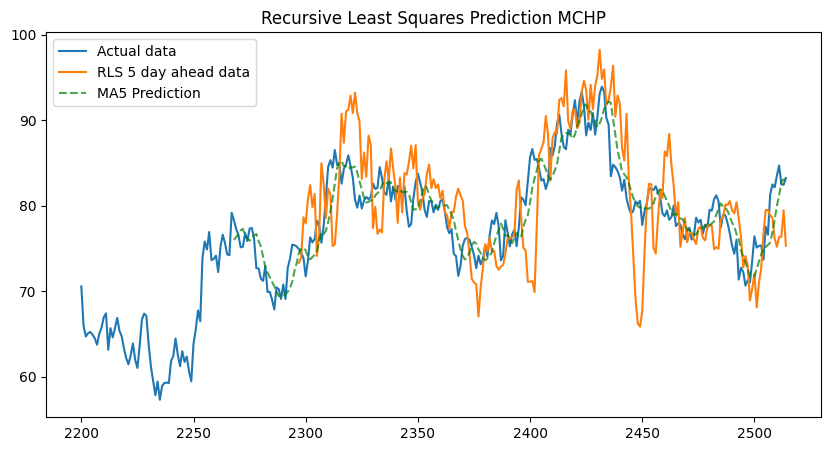

In [ ]:
stock = 0
test_idx = train_data.shape[1] + predict_offset
test_x = np.arange(test_idx, data_arr.shape[1])
train_start = 2200
train_x = np.arange(train_start, data_arr.shape[1])

ma_x = np.arange(train_data.shape[1] + 1, data_arr.shape[1])
plt.figure(figsize=(10, 5))
plt.plot(ma_x[4:], ma_Y_preds[stock], label="MA5 Prediction", color="green", alpha=0.7, linestyle='dashed')
plt.plot(train_x, data_arr[stock, train_start:], label="Actual data")
plt.plot(test_x, all_ypreds[stock], label="RLS 5 day ahead data")

plt.title(f"Recursive Least Squares Prediction {id2name[stock]}")
plt.legend()

### Lè begins Kalman Filter

In [ ]:
# P = 50
# window = 30
print(f"{'Stock':<10}{'MSE loss':<15}{'MAE loss':<15}{'Linf loss':<15}")

day_shift = 1
all_ypreds = []
all_ytrue = []
all_errors = []
losses = []
all_Ps = []

for idx, (x_in, x_train) in enumerate(zip(train_data, data_arr)):
    # Init Kalman params
    A, H = 1, 1
    P = 1 * 1e-1
    x_prev = x_train[0]
    # Estimate R (measurement noise covariance)
    R = np.var(x_in)
    # Estimate Q (process noise covariance)
    Q = np.var(np.diff(x_in)) * 10

    Y_preds = []
    Y_true = []
    errors = []
    N = x_train.shape[0]
    P_ests = [P]

    for i in range(1, N - day_shift):
        z = x_train[i + day_shift - 1]
        x_pred = A * x_prev
        P_pred = A * P * A + Q
        K = (P_pred * H) / (H * P_pred * H + R)
        x = x_pred + K * (z - H * x_pred)
        P = (1 - K * H) * P_pred

        # Updates and setting to next iters
        x_prev = x
        P_ests.append(P)
        Y_preds.append(x)
        Y_true.append(x_train[i + 1])

    all_Ps.append(P_ests)
    Y_true = np.array(Y_true)
    Y_preds = np.array(Y_preds)
    # Compute loss on test data alone
    mse = compute_mse(Y_true[split_idx:], Y_preds[split_idx:])
    mae = compute_mae(Y_true[split_idx:], Y_preds[split_idx:])
    linf = compute_linf(Y_true[split_idx:], Y_preds[split_idx:])
    print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
    losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

    all_ypreds.append(Y_preds)
    all_ytrue.append(Y_true)

x_in, x_train = amzn_train, amzn_data
idx += 1
# Init Kalman params
A, H = 1, 1
P = 1 * 1e-1
x_prev = x_train[0]
# Estimate R (measurement noise covariance)
R = np.var(x_in)
# Estimate Q (process noise covariance)
Q = np.var(np.diff(x_in)) * 10

Y_preds = []
Y_true = []
errors = []
N = x_train.shape[0]
P_ests = [P]

for i in range(1, N - day_shift):
    z = x_train[i + day_shift - 1]
    x_pred = A * x_prev
    P_pred = A * P * A + Q
    K = (P_pred * H) / (H * P_pred * H + R)
    x = x_pred + K * (z - H * x_pred)
    P = (1 - K * H) * P_pred

    # Updates and setting to next iters
    x_prev = x
    P_ests.append(P)
    Y_preds.append(x)
    Y_true.append(x_train[i + 1])

all_Ps.append(P_ests)
Y_true = np.array(Y_true)
Y_preds = np.array(Y_preds)
# Compute loss on test data alone
mse = compute_mse(Y_true[split_idx:], Y_preds[split_idx:])
mae = compute_mae(Y_true[split_idx:], Y_preds[split_idx:])
linf = compute_linf(Y_true[split_idx:], Y_preds[split_idx:])
print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

Stock     MSE loss       MAE loss       Linf loss      
MCHP      7.1269         2.1239         7.5870         
APH       3.5297         1.5232         4.8843         
STM       4.0339         1.5984         5.7686         
ADI       22.9669        3.7152         18.5749        
IFNNY     2.1609         1.1631         4.6542         
TSM       14.4449        2.9896         13.3571        
INTC      1.6161         0.9953         4.4751         
GLW       0.6212         0.6250         3.1793         
TXN       19.6147        3.6174         12.5960        
AMAT      22.9207        3.8378         13.0580        
AMD       30.3955        4.3163         22.6845        
KLAC      284.4575       13.5052        51.4671        
NXPI      35.8682        4.8993         17.1620        
NVDA      432.1084       15.9880        81.0075        
MRVL      8.3891         2.0093         20.6829        
MPWR      665.2445       20.4483        86.0628        
MRAAY     0.0558         0.1852         0.7341  

#### Using Kalman with velocity

In [221]:
print(f"{'Stock':<10}{'MSE loss':<15}{'MAE loss':<15}{'Linf loss':<15}")

window = 20
day_shift = 1
all_ypreds = []
all_ytrue = []
all_errors = []
kalman_losses = []
all_Ps = []
all_MA40s = []
all_MA5 = []

for idx, (x_in, x_train) in enumerate(zip(train_data, data_arr)):
    velocity = np.diff(x_train) # Rate of change of stock price
    velocity = np.hstack(([0], velocity))   # prepend a 0 for initial velocity
    
    # Init Kalman params
    A = np.array([[1, 1], [0, 1]])    # (2, 2)
    H = np.array([[1, 0]])    # (1, 2)
    P = np.eye(2) # (2,2) identity matrix
    x_prev = np.array([[x_train[0]], [0]])  # (2,1) with initial velocity 0

    # Estimate R (measurement noise covariance)
    R = np.reshape(np.var(x_in), (1,1))
    # Estimate Q (process noise covariance)
    vel_in = velocity[:len(x_in)]
    del_x0 = np.diff(x_in) - vel_in[:-1]
    del_x1 = np.diff(vel_in)
    Q = np.cov(np.vstack((del_x0, del_x1))) * 1e-1
    # print(R, Q)

    Y_preds = []
    Y_true = []
    errors = []
    N = x_train.shape[0]
    P_ests = [P]
    MA40 = []
    MA5 = []

    for i in range(day_shift, N):
        # Compute moving average
        if i > window:
            MA40.append(np.mean(x_train[i-window:i]))
        if i > 5:
            MA5.append(np.mean(x_train[i-5:i]))

        z = np.array([x_train[i - day_shift]])
        x_pred = A @ x_prev # (2, 2) * (2, 1) --> (2, 1)
        P_pred = A @ P @ A.T + Q    # (2,2) + (2,2) --> (2,2)
        K = (P_pred @ H.T) / (H @ P_pred @ H.T + R) # (2,2) * (2,1) / (1,1) --> (2,1)
        x = x_pred + K @ (z - H @ x_pred)
        P = (np.eye(2) - K @ H) @ P_pred    # (2,2) * (2,2) --> (2,2)
        # P = Q if np.linalg.det(P) > 100 else P

        # Updates and setting to next iters
        x_prev = x
        P_ests.append(P)
        Y_preds.append(x[0][0])
        Y_true.append(x_train[i])

    all_Ps.append(P_ests)
    all_MA40s.append(MA40)
    all_MA5.append(MA5)
    Y_true = np.array(Y_true)
    Y_preds = np.array(Y_preds)
    # Compute loss only on test data
    mse = compute_mse(Y_true[split_idx:], Y_preds[split_idx:])
    mae = compute_mae(Y_true[split_idx:], Y_preds[split_idx:])
    linf = compute_linf(Y_true[split_idx:], Y_preds[split_idx:])
    print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
    kalman_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

    all_ypreds.append(Y_preds)
    all_ytrue.append(Y_true)

# Run for Amazon dataset
idx += 1
x_in, x_train = amzn_train, amzn_data
velocity = np.diff(x_train) # Rate of change of stock price
velocity = np.hstack(([0], velocity))   # prepend a 0 for initial velocity

# Init Kalman params
A = np.array([[1, 1], [0, 1]])    # (2, 2)
H = np.array([[1, 0]])    # (1, 2)
P = np.eye(2) # (2,2) identity matrix
x_prev = np.array([[x_train[0]], [0]])  # (2,1) with initial velocity 0

# Estimate R (measurement noise covariance)
R = np.reshape(np.var(x_in), (1,1))
# Estimate Q (process noise covariance)
vel_in = velocity[:len(x_in)]
del_x0 = np.diff(x_in) - vel_in[:-1]
del_x1 = np.diff(vel_in)
Q = np.cov(np.vstack((del_x0, del_x1))) * 1e-1
# print(R, Q)

Y_preds = []
Y_true = []
errors = []
N = x_train.shape[0]
P_ests = [P]
MA40 = []
MA5 = []

for i in range(day_shift, N):
    # Compute moving average
    if i > window:
        MA40.append(np.mean(x_train[i-window:i]))
    if i > 5:
        MA5.append(np.mean(x_train[i-5:i]))

    z = np.array([x_train[i - day_shift]])
    x_pred = A @ x_prev # (2, 2) * (2, 1) --> (2, 1)
    P_pred = A @ P @ A.T + Q    # (2,2) + (2,2) --> (2,2)
    K = (P_pred @ H.T) / (H @ P_pred @ H.T + R) # (2,2) * (2,1) / (1,1) --> (2,1)
    x = x_pred + K @ (z - H @ x_pred)
    P = (np.eye(2) - K @ H) @ P_pred    # (2,2) * (2,2) --> (2,2)
    # P = Q if np.linalg.det(P) > 100 else P

    # Updates and setting to next iters
    x_prev = x
    P_ests.append(P)
    Y_preds.append(x[0][0])
    Y_true.append(x_train[i])

all_Ps.append(P_ests)
all_MA40s.append(MA40)
all_MA5.append(MA5)
Y_true = np.array(Y_true)
Y_preds = np.array(Y_preds)
# Compute loss only on test data
mse = compute_mse(Y_true[split_idx:], Y_preds[split_idx:])
mae = compute_mae(Y_true[split_idx:], Y_preds[split_idx:])
linf = compute_linf(Y_true[split_idx:], Y_preds[split_idx:])
print(f"{id2name[idx]:<10}{mse:<15.4f}{mae:<15.4f}{linf:<15.4f}")
kalman_losses.append({"MSE" : mse, "MAE" : mae, "Linf" : linf})

all_ypreds.append(Y_preds)
all_ytrue.append(Y_true)

# all_MA40s = np.array(all_MA40s)
# all_MA5 = np.array(all_MA5)

Stock     MSE loss       MAE loss       Linf loss      
MCHP      6.5141         2.0675         8.2449         
APH       2.7949         1.3482         4.5561         
STM       3.2167         1.4775         4.6251         
ADI       20.6398        3.6168         14.6396        
IFNNY     2.0960         1.1623         4.9281         
TSM       11.5988        2.6648         11.3532        
INTC      1.6755         1.0507         3.9207         
GLW       0.5819         0.5675         2.8006         
TXN       17.9679        3.4030         11.9869        
AMAT      20.6436        3.7682         11.4796        
AMD       25.7175        4.0374         16.6849        
KLAC      222.9909       11.9327        44.0127        
NXPI      32.8328        4.5925         16.9759        
NVDA      303.3329       13.2865        71.2453        
MRVL      6.9204         1.9104         18.8794        
MPWR      537.8588       18.0232        94.5943        
MRAAY     0.0626         0.1942         0.8688  

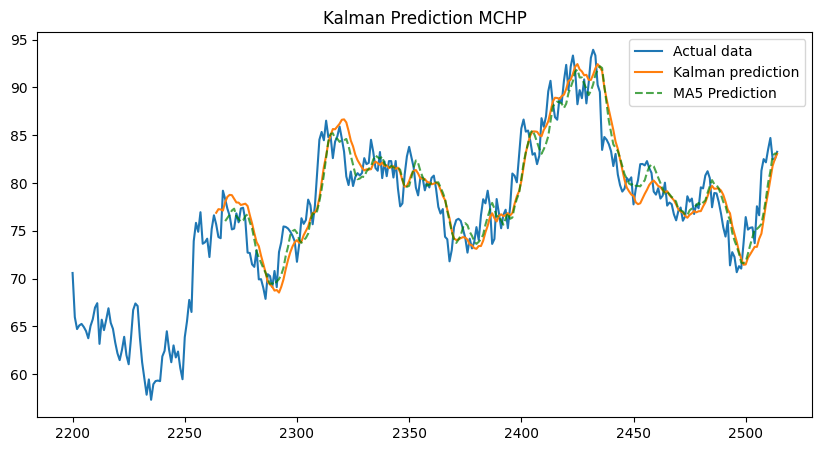

In [242]:
stock = 0
test_idx = train_data.shape[1]
test_x = np.arange(test_idx + 1, data_arr.shape[1])
train_start = 2200
train_x = np.arange(train_start, data_arr.shape[1])
plt.figure(figsize=(10, 5))
plt.plot(train_x, data_arr[stock, train_start:], label="Actual data")
plt.plot(test_x, all_ypreds[stock][test_idx:], label="Kalman prediction")
plt.plot(test_x[4:], ma_Y_preds[stock], label="MA5 Prediction", color="green", alpha=0.7, linestyle='dashed')
plt.title(f"Kalman Prediction {id2name[stock]}")
plt.legend()

In [214]:
# Define all methods and their corresponding loss lists
methods = {
    "kalman": kalman_losses,
    "rls": rls_losses,
    "LMS": LMSlosses,
    "wiener": wiener_losses,
    "ma5": ma5_losses,
    "ma50": ma50_losses,
    "ma200": ma200_losses,
}

# List of loss types
loss_types = ["MSE", "MAE", "Linf"]

# Helper function to create a table for a specific loss type
def create_loss_table(loss_type):
    # Initialize a dictionary to store data for the table
    table_data = {"Stock": [id2name[i] for i in range(27)]}
    
    # Add losses for each method
    for method, losses in methods.items():
        table_data[method] = [round(loss[loss_type], 2) for loss in losses]  # Round to 2 decimal places
    
    # Convert to a DataFrame for better visualization
    df = pd.DataFrame(table_data)
    return df

# Helper function to create the average loss table
def create_average_table():
    averages = {"Method": [], "MSE": [], "MAE": [], "Linf": []}
    
    for method, losses in methods.items():
        averages["Method"].append(method)
        for loss_type in loss_types:
            # Compute average loss for the method and loss type
            avg_loss = np.mean([loss[loss_type] for loss in losses])
            averages[loss_type].append(round(avg_loss, 2))  # Round to 2 decimal places
    
    # Convert to a DataFrame for better visualization
    df = pd.DataFrame(averages)
    return df

# Generate and print tables for each loss type
for loss_type in loss_types:
    print(f"\n{loss_type} Loss Table:")
    table = create_loss_table(loss_type)
    print(table.to_string(index=False))  # Remove the preceding index column

# Generate and print the average loss table
print("\nAverage Loss Table:")
average_table = create_average_table()
print(average_table.to_string(index=False))  #


MSE Loss Table:
Stock  kalman     rls    LMS   wiener    ma5    ma50    ma200
 MCHP    6.51   28.57   3.82    37.71   5.57   32.04    20.10
  APH    2.79    8.65   1.09    13.69   2.11   12.44    18.74
  STM    3.22   11.29   1.11    23.15   2.34   17.38    21.02
  ADI   20.64   85.32  11.79    87.92  17.98   80.85   143.20
IFNNY    2.10    8.05   0.96    10.10   1.66    7.82    20.61
  TSM   11.60   35.08   4.07    58.71   6.91   42.30    17.71
 INTC    1.68    6.54   0.68 51251.09   1.60    5.99    35.99
  GLW    0.58    1.81   0.23     4.89   0.49    3.30    19.69
  TXN   17.97   48.47   7.10    85.35  12.36   60.64   360.09
 AMAT   20.64   56.53   9.84    92.97  16.06   80.36   184.48
  AMD   25.72   66.68  10.84   152.93  17.18  114.35   110.24
 KLAC  222.99  728.21 109.08  1165.11 179.41 1089.85  3550.37
 NXPI   32.83  105.38  16.68   226.67  27.95  197.57   130.14
 NVDA  303.33 1505.93 116.16  2177.87 232.16 2571.59 12326.04
 MRVL    6.92   57.46   3.27    51.16   5.62   46.09 